### **CSCE 5210, Group-13**
**Project: Plant Disease Detection using Artificial Intelligence**

CNN model for predicting plant diseases

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
tf.compat.v1.set_random_seed(0)
import numpy as np
np.random.seed(0)
from tensorflow import keras
from keras.preprocessing.image import image_dataset_from_directory
from keras.utils.vis_utils import plot_model
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

Importing datasets 

In [ ]:
train_dir="/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)-20220417T002219Z-001/New Plant Diseases Dataset(Augmented)/train"
test_valid_dir="/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)-20220417T002219Z-001/New Plant Diseases Dataset(Augmented)/test-valid"
test_dir="/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)-20220417T002219Z-001/New Plant Diseases Dataset(Augmented)/test"

In [ ]:
train_data = image_dataset_from_directory(directory="/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)-20220417T002219Z-001/New Plant Diseases Dataset(Augmented)/train",image_size=(256, 256))

Found 4488 files belonging to 38 classes.


In [ ]:
valid_data = image_dataset_from_directory(directory="/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)-20220417T002219Z-001/New Plant Diseases Dataset(Augmented)/test-valid",image_size=(256, 256))

Found 1638 files belonging to 38 classes.


Rescaling data

In [ ]:
rescale = Rescaling(scale=1.0/255)
train_gen = train_data.map(lambda image,label:(rescale(image),label))
test_gen  = valid_data.map(lambda image,label:(rescale(image),label))

Build a sequential model

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                  

In [ ]:
len(model.layers)

17

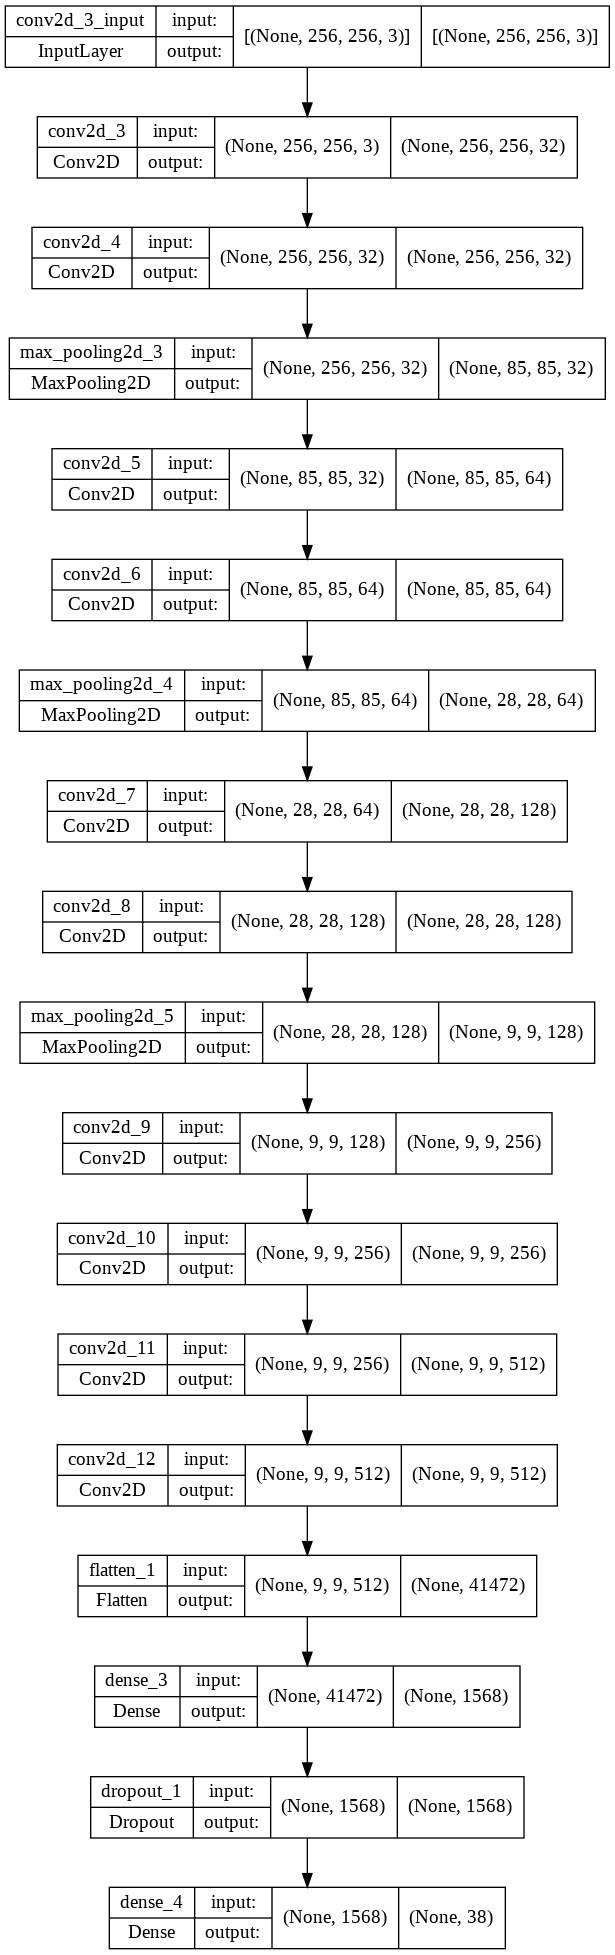

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)


In [ ]:
cnn = model.fit_generator(train_data,validation_data=valid_data,epochs = 10)

Epoch 1/10
141/141 [==============================] - 1785s 13s/step - loss: 3.1531 - accuracy: 0.1522 - val_loss: 2.3865 - val_accuracy: 0.3315
Epoch 2/10
141/141 [==============================] - 1765s 13s/step - loss: 1.9459 - accuracy: 0.4336 - val_loss: 1.7662 - val_accuracy: 0.4786


Tuning the model

In [ ]:
EPOCHS = 10
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3

model = keras.Sequential()
inputShape = (height, width, depth)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5),input_shape=inputShape,activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(keras.layers.Conv2D(32, (3, 3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))   
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(128,activation='relu'))          
model.add(keras.layers.Dense(38,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)      

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


In [ ]:
# Preprocessing data.
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
# valid_generator=test_datagen.flow_from_directory(test_valid_dir,shuffle=True,
#                                                    target_size=(img_width,img_height),
#                                                    batch_size=batch_size)

Found 4488 images belonging to 38 classes.


In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 4488 images belonging to 38 classes.


In [ ]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

train = model.fit_generator(train_generator, 
                    validation_data=validation_generator, epochs=25, verbose=2)

Epoch 1/25
141/141 - 1274s - loss: 3.3669 - accuracy: 0.0996 - val_loss: 2.8542 - val_accuracy: 0.2195 - 1274s/epoch - 9s/step
Epoch 2/25
141/141 - 508s - loss: 2.4731 - accuracy: 0.2874 - val_loss: 1.9406 - val_accuracy: 0.4483 - 508s/epoch - 4s/step
Epoch 3/25
141/141 - 505s - loss: 1.8798 - accuracy: 0.4323 - val_loss: 1.3229 - val_accuracy: 0.5965 - 505s/epoch - 4s/step
Epoch 4/25
141/141 - 505s - loss: 1.4872 - accuracy: 0.5385 - val_loss: 1.2380 - val_accuracy: 0.6355 - 505s/epoch - 4s/step
Epoch 5/25
141/141 - 504s - loss: 1.1525 - accuracy: 0.6497 - val_loss: 0.8973 - val_accuracy: 0.7079 - 504s/epoch - 4s/step
Epoch 6/25
141/141 - 505s - loss: 0.9545 - accuracy: 0.7019 - val_loss: 0.7427 - val_accuracy: 0.7672 - 505s/epoch - 4s/step
Epoch 7/25
141/141 - 509s - loss: 0.8386 - accuracy: 0.7371 - val_loss: 0.6049 - val_accuracy: 0.8151 - 509s/epoch - 4s/step
Epoch 8/25
141/141 - 509s - loss: 0.7018 - accuracy: 0.7779 - val_loss: 0.4302 - val_accuracy: 0.8630 - 509s/epoch - 4s/ste

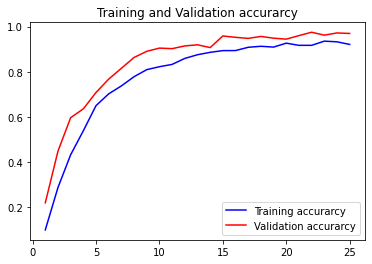

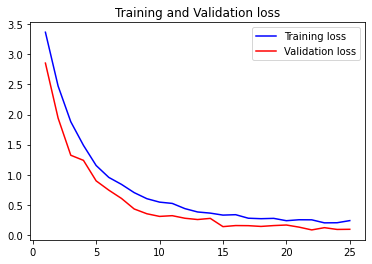

In [ ]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model.save('disease_detector.h5')

In [ ]:
model.save_weights('disease_detector_weights.h5')

In [ ]:
labels = []
predictions = []
for x,y in valid_data:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Accuracy  : {:.2f} %".format(train.history['accuracy'][-1]*100))
# print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))
print("F-1 Score    : {:.2f} %".format(f1_score(labels, predictions, average='micro') * 100))

Accuracy  : 92.07 %
Precision Score : 38.03 %
Recall Score    : 38.03 %


NameError: ignored

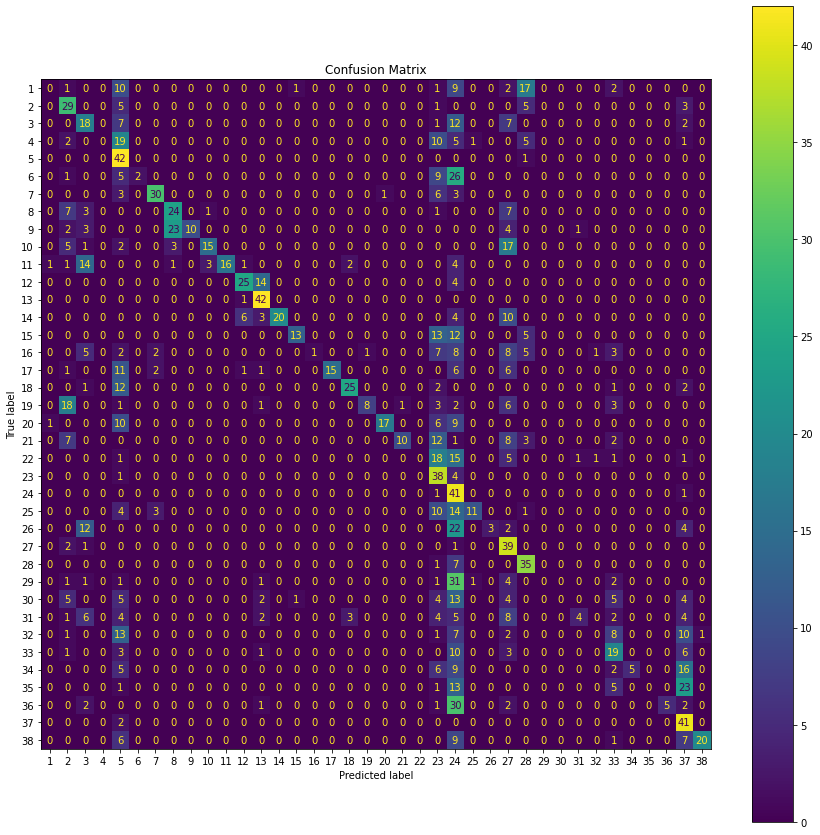

In [ ]:
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

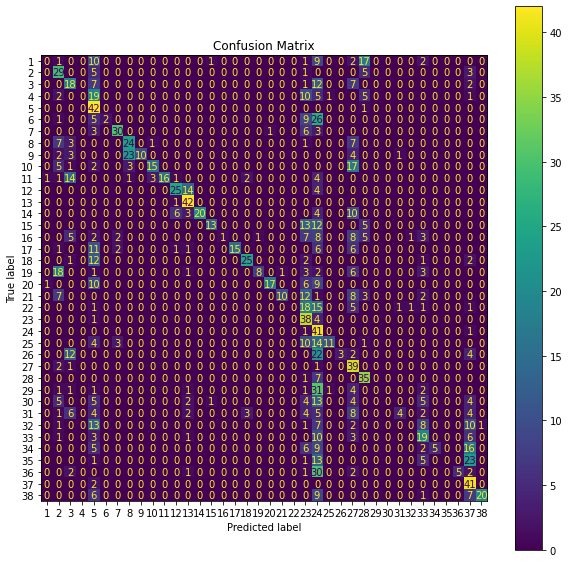

In [ ]:
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from matplotlib import transforms
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
test_dir="/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)-20220417T002219Z-001/New Plant Diseases Dataset(Augmented)/test"
test=ImageFolder(test_dir,transform=transforms.ToTensor())

In [ ]:
import os
test_images= sorted(os.listdir(test_dir+'/test'))
test_images

['Apple__Apple_scab',
 'Apple__Cedar_apple_rust (1).JPG',
 'Apple__Cedar_apple_rust (2).JPG',
 'Apple__Cedar_apple_rust (3).JPG',
 'Apple__Cedar_apple_rust.JPG',
 'Corn_(maize)___Common_rust_ (1).JPG',
 'Corn_(maize)___Common_rust_ (2).JPG',
 'Corn_(maize)___Common_rust_.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']